In [1]:
%matplotlib inline
import h5py
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 20,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

# Read in M_pv posterior

In [8]:
runname = '3G-5kMpv-2000live'

In [9]:
path = '/work/yifan.wang/WWW/parityinj/prod/'+runname
mpvsample = []
snrarray = []

for i in np.arange(1,201):
    print(i)
  # read the file
    try:
        h5file = h5py.File(path+'/files_output/posterior_files/E1E2E3H1L1-EXTRACT_POSTERIOR_INJECTION_'+"{:03d}".format(i)+'-1125100817-63158401.hdf','r')              
        mpvsample.append( h5file['samples']['mpvinverse'][()] )
        #np.savetxt('/work/yifan.wang/WWW/parityinj/prod/DataAnalysis/3Glow20Mpv_'+"{:03d}".format(i)+'.txt', np.transpose(mpv))
        snrarray.append(np.mean(h5file['samples']['snr'][()]))
    except IOError:
        print(f'The {i:d}th event is not finished yet')
        pass

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [10]:
snrarray

[145.13827088729565,
 187.18623843584757,
 299.12653201441236,
 109.13023552132108,
 47.41664044806014,
 247.6119781456118,
 152.18468499795264,
 359.22948909716564,
 385.37094537809514,
 228.9770808103922,
 96.52964155767403,
 70.54050388132626,
 159.5462592183814,
 166.35966966064925,
 421.1707893232179,
 79.89501731886321,
 353.37639036821196,
 90.05616292195333,
 390.43673555941945,
 56.69457721220725,
 229.9044247747997,
 136.11892507205826,
 293.8494638808634,
 30.439715784600224,
 375.59022025232963,
 232.63464461477616,
 69.30375095767931,
 67.5304805679429,
 107.27776270630466,
 368.6900260884069,
 100.19308809093621,
 227.3303394289004,
 24.39083720143701,
 140.22666166223354,
 172.98640214730585,
 202.16041824797955,
 196.15158278047224,
 184.60105463307406,
 34.40788634775661,
 265.2172851371392,
 108.65360587825687,
 55.559229752465015,
 126.6422770551667,
 218.93564293989274,
 105.41799339876384,
 108.00069996206203,
 76.63170136772116,
 57.44280683905822,
 21.98265434474

# Use the rerun value to substitute the bad value

In [11]:
for i in [55,93,173]:
    print(i)
  # read the file
    try:
        h5file = h5py.File('/work/yifan.wang/WWW/parityinj/prod/3G-5kMpv-800live/files_output/posterior_files/E1E2E3H1L1-EXTRACT_POSTERIOR_INJECTION_'+"{:03d}".format(i)+'-1125100817-63158401.hdf','r')              
        mpvsample[i-1] = h5file['samples']['mpvinverse'][()] 
    except IOError:
        print(f'The {i:d}th event is not finished yet')
        pass

55
93
173


# Combine the multiple Mpv posterior

In [12]:
#fig = plt.figure();
#ax = fig.add_subplot(111)

#bins = np.logspace(-15,-8,100)
binmin = -1e-9
binmax = 1e-9
binnum = 1001
bins = np.linspace(binmin,binmax,binnum)
combine = np.ones(len(bins))
Mpvresult = []

for i in np.arange(1,len(mpvsample)+1):
    print(i)
    # Select the data with SNR > 8
    if snrarray[i-1]<8:
        print(f'The {i:d}th event has SNR lower than 8.')
        continue
    # KDE to get the mpv distribution  
    try:
        Mpv = mpvsample[i-1]
        kde = stats.gaussian_kde(Mpv)
        if np.quantile(Mpv,0.001) > 0 or kde(0)==0 or np.quantile(Mpv,0.999)<0:
        #if kde(0)==0:
            print(f'The {i:d}th event has wrong PE results.')
            Mpvresult.append(Mpvresult[-1])
            continue
        normcache = np.sum(kde(bins[int(len(bins)/2):]))*(bins[2]-bins[1])
        for k,n in enumerate(bins):
            combine[k] = combine[k] * kde(n) / normcache
    except IOError:
        print(f'The {i:d}th event has IO error.')
        pass
    except ValueError:
        print(f'The {i:d}th event has value error.')
        pass
    
    # normalization to get the combined result
    combine = combine/np.sum(combine)/(bins[2]-bins[1])
    PositiveNormFactor = np.sum(combine[int(len(bins)/2):])*(bins[2]-bins[1])
    CacheCombineMpv = combine/PositiveNormFactor
    
    ind = 1
    findsum = CacheCombineMpv[-ind]
    while findsum*(bins[2]-bins[1]) < 0.1:
        ind = ind+1
        findsum += CacheCombineMpv[-ind]
        
    Mpvresult.append(1./bins[-ind])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


(10000000.0, 100000000000.0)

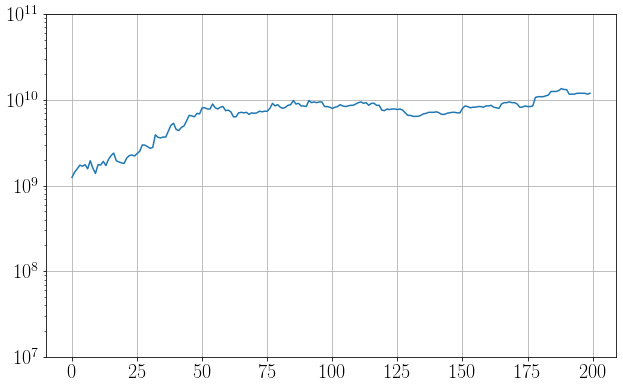

In [13]:
plt.plot(Mpvresult)
plt.yscale('log')
plt.ylim(1e7,1e11)

In [14]:
Mpvresult

[1246882793.0174565,
 1432664756.4469917,
 1567398119.1222575,
 1730103806.228374,
 1677852348.9932892,
 1754385964.912281,
 1567398119.1222575,
 1945525291.8287942,
 1597444089.4568694,
 1385041551.2465374,
 1754385964.912281,
 1736111111.1111114,
 1915708812.260537,
 1712328767.1232882,
 2016129032.2580647,
 2232142857.1428576,
 2392344497.6076555,
 1945525291.8287942,
 1886792452.8301892,
 1838235294.1176472,
 1811594202.898551,
 2092050209.205021,
 2232142857.1428576,
 2272727272.727273,
 2212389380.530974,
 2358490566.037736,
 2512562814.0703526,
 2976190476.1904774,
 2958579881.656806,
 2840909090.9090924,
 2717391304.3478265,
 2777777777.7777777,
 3906250000.000001,
 3649635036.4963517,
 3597122302.158275,
 3676470588.235296,
 3676470588.235296,
 4310344827.58621,
 5050505050.505053,
 5319148936.170214,
 4504504504.504507,
 4385964912.2807045,
 4761904761.904764,
 4950495049.504952,
 5681818181.818181,
 6578947368.421058,
 6493506493.506498,
 6329113924.050638,
 6944444444.44444

In [15]:
1./71428571.42857146

1.3999999999999993e-08

In [16]:
np.savetxt('./DataAnalysis/3Gresults.txt',np.transpose(Mpvresult))

# Plotting

In [2]:
threeg = np.loadtxt('./DataAnalysis/3Gresults.txt')
voyager = np.loadtxt('./DataAnalysis/voyagerresults.txt')
aplus = np.loadtxt('./DataAnalysis/A+results.txt')
hlvk = np.loadtxt('./DataAnalysis/HLVKresults.txt')

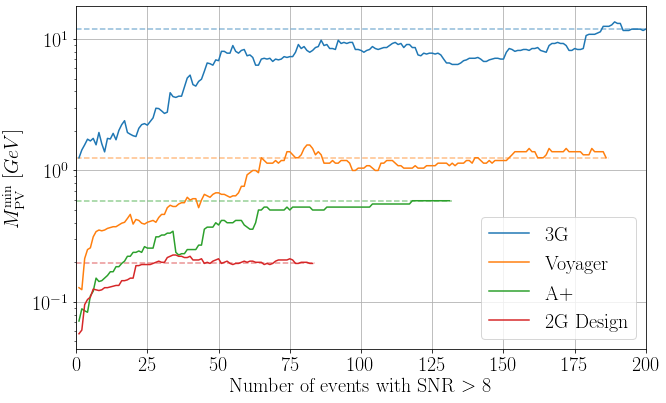

In [6]:
GeV = 1e9
plt.plot(range(1,len(threeg)+1),threeg/GeV,label='3G')
plt.plot(range(1,len(voyager)+1),voyager/GeV,label='Voyager')
plt.plot(range(1,len(aplus)+1),aplus/GeV,label='A+')
plt.plot(range(1,len(hlvk)+1),hlvk/GeV,label='2G Design')

plt.hlines(threeg[-1]/GeV,0,200,ls='--',color='tab:blue',alpha=0.5)
plt.hlines(voyager[-1]/GeV,0,len(voyager)+1,ls='--',color='tab:orange',alpha=0.5)
plt.hlines(aplus[-1]/GeV,0,len(aplus)+1,ls='--',color='tab:green',alpha=0.5)
plt.hlines(hlvk[-1]/GeV,0,len(hlvk)+1,ls='--',color='tab:red',alpha=0.5)

plt.xlabel('Number of events with SNR $>$ 8')
plt.ylabel(r'$M^\mathrm{min}_\mathrm{PV}~[GeV]$')
plt.xlim(0,200)
plt.legend()
plt.yscale('log')
plt.savefig('./3g.png',bbox_inches='tight')